In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
focus = pd.read_csv(r"C:\Users\AY\Desktop\my SHIT\D.E.P.T.S\personal\pomodoro data year 2024.csv")
focus['Date'] = pd.to_datetime(focus['Date'], dayfirst = True)
"""Note that the format for the entry of data is hours,minutes. This was chosen as recording the hr and min in separate would have been tedious"""
focus.head(10)


,ID,Date,Data,Spiritual,Business,Skill/Intell,Reflect,School,Restore,Thoughts,Ideas
0,NaN,2024-01-15,NaN,NaN,NaN,"4,35",NaN,"3,17",NaN,NaN,NaN
1,NaN,2024-01-22,"1,15",NaN,NaN,"2,10",NaN,"22,54",NaN,NaN,NaN
2,NaN,2024-01-29,"0,50",NaN,NaN,"2,52",NaN,"15,3",NaN,NaN,NaN
3,NaN,2024-02-05,"1,49","2,4",NaN,"2,39",NaN,"21,10",NaN,NaN,NaN
4,NaN,2024-02-12,"4,26","0,46",NaN,"3,31",NaN,"25,48",NaN,NaN,NaN
5,NaN,2024-02-19,"6,19","0,24",NaN,"5,41",NaN,"32,3",NaN,NaN,NaN
6,NaN,2024-02-26,"2,9","0,23",NaN,"5,17",NaN,"42,45",NaN,NaN,NaN
7,NaN,2024-03-04,"6,55","2,5",NaN,"5,13",NaN,"21,56",NaN,NaN,NaN
8,NaN,2024-03-11,"9,4","3,46",NaN,"6,25",NaN,"5,39",NaN,NaN,NaN
9,NaN,2024-03-18,"10,31","5,30",NaN,"3,28",NaN,"4,33",NaN,NaN,NaN


In [59]:
'''Cleaning and dropping data not needed'''
focus.drop(columns = 'ID', inplace = True)
#focus.loc[13, 'Data'] = '1,25'
focus.drop(columns = ['Thoughts', 'Ideas'], inplace = True)
focus.head(10)

,Date,Data,Spiritual,Business,Skill/Intell,Reflect,School,Restore
0,2024-01-15,NaN,NaN,NaN,"4,35",NaN,"3,17",NaN
1,2024-01-22,"1,15",NaN,NaN,"2,10",NaN,"22,54",NaN
2,2024-01-29,"0,50",NaN,NaN,"2,52",NaN,"15,3",NaN
3,2024-02-05,"1,49","2,4",NaN,"2,39",NaN,"21,10",NaN
4,2024-02-12,"4,26","0,46",NaN,"3,31",NaN,"25,48",NaN
5,2024-02-19,"6,19","0,24",NaN,"5,41",NaN,"32,3",NaN
6,2024-02-26,"2,9","0,23",NaN,"5,17",NaN,"42,45",NaN
7,2024-03-04,"6,55","2,5",NaN,"5,13",NaN,"21,56",NaN
8,2024-03-11,"9,4","3,46",NaN,"6,25",NaN,"5,39",NaN
9,2024-03-18,"10,31","5,30",NaN,"3,28",NaN,"4,33",NaN


In [60]:
'''This helps to append the coordinates of a value that is NaN into a list. In the course of data transformation, they are
 changed to zeros. After the transformation, I hope to change them back to NaN'''
tuple_list = []
for col in focus.columns:
    for x in focus.index:
        if pd.isna(focus.loc[x, col]):
            tuple_list.append((x, col))
tuple_list[:10]

[(51, 'Date'),
 (0, 'Data'),
 (51, 'Data'),
 (0, 'Spiritual'),
 (1, 'Spiritual'),
 (2, 'Spiritual'),
 (51, 'Spiritual'),
 (0, 'Business'),
 (1, 'Business'),
 (2, 'Business')]

In [ ]:
# '''Converting the hr,min format to hr only. Starting with one column and a for loop'''

# xpand = focus['School'].str.split(',', expand = True)
# # This splits the hr,min into hr columns and min columns. 0 for hr and 1 for min.

# school_sum = []
# for x in focus.index:
#     min = xpand.loc[x, 1]
#     if pd.isna(min): # == True:
#         hr2 = 0
#     else:
#         min = int(xpand.loc[x, 1])
#         hr2 = min/60
# # The min is converted to hours here
    
#     hr1 = xpand.loc[x, 0]
#     if pd.isna(hr1): # == True:
#         hr1 = 0
#     else:
#         hr1 = int(xpand.loc[x, 0])
#     sums = hr1 + hr2
#     school_sum.append(sums)
#     if x == (len(xpand)-1):
#         focus.loc[:,'School_hr'] = school_sum
# focus.head(10)
# # using the min == np.nan won't work because NaN is not equal to itself. NaN represents an undefined result, and can 
# # theoretically have different sources. So they aren't considered equal, even to themselves. NaN values do not connote equality
# # pd.isna() and np.isnan() will work instead. pd.isna() is the guy.

In [ ]:
# '''Converting the hr,min format to hour only. A function this time, with any specified column and a for loop'''

# #Creating a funtion to split hour,minute format and convert to hour only for one column
# def hr_min_to_hr(df, col):
#     row_sum = []
#     xpand = df[col].str.split(',', expand = True)
#     for x in df.index:
#         min = xpand.loc[x, 1]
#         if pd.isna(min): # == True:
#             hr2 = 0
#         else:
#             min = int(xpand.loc[x, 1])
#             hr2 = min/60
            
#         hr1 = xpand.loc[x, 0]
#         if pd.isna(hr1): # == True:
#             hr1 = 0
#         else:
#             hr1 = int(xpand.loc[x, 0])
#         sums = hr1 + hr2
#         row_sum.append(sums)
#         if x == (len(xpand)-1):
#             df.loc[:, f'{col}_hr'] = row_sum
            
# hr_min_to_hr(focus, 'Spiritual')
# focus.head(10)

In [61]:
''' Creating a funtion to split hour,minute format and convert to hour only for all columns.'''

def df_hr_min_to_hr(df, *args):
    for col in df.columns:
#       if you want to exclude columns, you can do it here
        exs = [*args]
        if col in exs:
            continue
        else:
            row_sum = []
            xpand = df[col].str.split(',', expand = True)
            for x in df.index:
                min = xpand.loc[x, 1]
                if pd.isna(min): # == True:
                    hr2 = 0
                else:
                    min = int(xpand.loc[x, 1])
                    hr2 = min/60
                    
                hr1 = xpand.loc[x, 0]
                if pd.isna(hr1): # == True:
                    hr1 = 0
                else:
                    hr1 = int(xpand.loc[x, 0])
                sums = hr1 + hr2
                row_sum.append(sums)
                if x == (len(xpand)-1):
                    df.loc[:, f'{col}'] = row_sum
                    df[f'{col}'] = pd.to_numeric(df[f'{col}'], downcast = 'float')
                    df[f'{col}'] = df[f'{col}'].apply(lambda x: np.around(x,2))
                    #np.around(df[f'{col} sum'], 2)

df_hr_min_to_hr(focus, 'Date', 'Total')
focus.head(20)

,Date,Data,Spiritual,Business,Skill/Intell,Reflect,School,Restore
0,2024-01-15,0.00,0.00,0.0,4.58,0.0,3.28,0.0
1,2024-01-22,1.25,0.00,0.0,2.17,0.0,22.90,0.0
2,2024-01-29,0.83,0.00,0.0,2.87,0.0,15.05,0.0
3,2024-02-05,1.82,2.07,0.0,2.65,0.0,21.17,0.0
4,2024-02-12,4.43,0.77,0.0,3.52,0.0,25.80,0.0
5,2024-02-19,6.32,0.40,0.0,5.68,0.0,32.05,0.0
6,2024-02-26,2.15,0.38,0.0,5.28,0.0,42.75,0.0
7,2024-03-04,6.92,2.08,0.0,5.22,0.0,21.93,0.0
8,2024-03-11,9.07,3.77,0.0,6.42,0.0,5.65,0.0
9,2024-03-18,10.52,5.50,0.0,3.47,0.0,4.55,0.0


In [62]:
'''suming all columns along a row of the dataframe'''
focus['Total'] = [0.0 for x in range(0, len(focus.index))]
for ind in focus.index:
    total = []
    exs = ['Date', 'Total']
    for col in focus.columns:
        if col in exs:
            continue
        else:
            val = focus.loc[ind, col]
            total.append(val)
            if (len(focus.columns) - len(exs)) == (len(total)):
                focus.loc[ind, 'Total'] = np.sum(total)

focus.head(20)

,Date,Data,Spiritual,Business,Skill/Intell,Reflect,School,Restore,Total
0,2024-01-15,0.00,0.00,0.0,4.58,0.0,3.28,0.0,7.86
1,2024-01-22,1.25,0.00,0.0,2.17,0.0,22.90,0.0,26.32
2,2024-01-29,0.83,0.00,0.0,2.87,0.0,15.05,0.0,18.75
3,2024-02-05,1.82,2.07,0.0,2.65,0.0,21.17,0.0,27.71
4,2024-02-12,4.43,0.77,0.0,3.52,0.0,25.80,0.0,34.52
5,2024-02-19,6.32,0.40,0.0,5.68,0.0,32.05,0.0,44.45
6,2024-02-26,2.15,0.38,0.0,5.28,0.0,42.75,0.0,50.56
7,2024-03-04,6.92,2.08,0.0,5.22,0.0,21.93,0.0,36.15
8,2024-03-11,9.07,3.77,0.0,6.42,0.0,5.65,0.0,24.91
9,2024-03-18,10.52,5.50,0.0,3.47,0.0,4.55,0.0,24.04


In [63]:
#suming all columns along a row ANY dataframe
def row_sum(df, *args):
    df['Total'] = [0.0 for x in range(0, len(focus.index))]
    for ind in df.index:
        total = []
        exs = [*args]
# The args are the columns to be excluded from the summation
        for col in df.columns:
            if col in exs:
                continue
            else:
                val = df.loc[ind, col]
                total.append(val)
                if (len(df.columns) - len(exs)) == (len(total)):
                    df.loc[ind, 'Total'] = np.sum(total)

row_sum(focus, 'Date', 'Total')
focus.head(10)
#All things being equal, len of columns should be equal to len of the total calculated. But when we exclude a column (exs), it is not being worked on,
#so to make it equal to len of total columns, we have to minus the total columns excluded to make them equal again
#the len(exs) needs to be subtracted from the df.columns because only the ones worked on will be added to total.

,Date,Data,Spiritual,Business,Skill/Intell,Reflect,School,Restore,Total
0,2024-01-15,0.00,0.00,0.0,4.58,0.0,3.28,0.0,7.86
1,2024-01-22,1.25,0.00,0.0,2.17,0.0,22.90,0.0,26.32
2,2024-01-29,0.83,0.00,0.0,2.87,0.0,15.05,0.0,18.75
3,2024-02-05,1.82,2.07,0.0,2.65,0.0,21.17,0.0,27.71
4,2024-02-12,4.43,0.77,0.0,3.52,0.0,25.80,0.0,34.52
5,2024-02-19,6.32,0.40,0.0,5.68,0.0,32.05,0.0,44.45
6,2024-02-26,2.15,0.38,0.0,5.28,0.0,42.75,0.0,50.56
7,2024-03-04,6.92,2.08,0.0,5.22,0.0,21.93,0.0,36.15
8,2024-03-11,9.07,3.77,0.0,6.42,0.0,5.65,0.0,24.91
9,2024-03-18,10.52,5.50,0.0,3.47,0.0,4.55,0.0,24.04


In [72]:
focus.style.background_gradient()

,Date,Data,Spiritual,Business,Skill/Intell,Reflect,School,Restore,Total
0,2024-01-15 00:00:00,0.000000,0.000000,0.000000,4.580000,0.000000,3.280000,0.000000,7.860000
1,2024-01-22 00:00:00,1.250000,0.000000,0.000000,2.170000,0.000000,22.900000,0.000000,26.320000
2,2024-01-29 00:00:00,0.830000,0.000000,0.000000,2.870000,0.000000,15.050000,0.000000,18.750000
3,2024-02-05 00:00:00,1.820000,2.070000,0.000000,2.650000,0.000000,21.170000,0.000000,27.710000
4,2024-02-12 00:00:00,4.430000,0.770000,0.000000,3.520000,0.000000,25.800000,0.000000,34.520000
5,2024-02-19 00:00:00,6.320000,0.400000,0.000000,5.680000,0.000000,32.050000,0.000000,44.450000
6,2024-02-26 00:00:00,2.150000,0.380000,0.000000,5.280000,0.000000,42.750000,0.000000,50.560000
7,2024-03-04 00:00:00,6.920000,2.080000,0.000000,5.220000,0.000000,21.930000,0.000000,36.150000
8,2024-03-11 00:00:00,9.070000,3.770000,0.000000,6.420000,0.000000,5.650000,0.000000,24.910000
9,2024-03-18 00:00:00,10.520000,5.500000,0.000000,3.470000,0.000000,4.550000,0.000000,24.040000


In [27]:
'''Next goal, put NaNs back in their rightful places'''
#tuple_list was gotten from the 3rd cell
for x, y in tuple_list:
    focus.loc[x, y] = np.nan
focus.head(10)

,Date,Data,Spiritual,Business,Skill/Intell,Reflect,School,Restore,Total
0,2024-01-15,NaN,NaN,NaN,4.58,NaN,3.28,NaN,7.86
1,2024-01-22,1.25,NaN,NaN,2.17,NaN,22.90,NaN,26.32
2,2024-01-29,0.83,NaN,NaN,2.87,NaN,15.05,NaN,18.75
3,2024-02-05,1.82,2.07,NaN,2.65,NaN,21.17,NaN,27.71
4,2024-02-12,4.43,0.77,NaN,3.52,NaN,25.80,NaN,34.52
5,2024-02-19,6.32,0.40,NaN,5.68,NaN,32.05,NaN,44.45
6,2024-02-26,2.15,0.38,NaN,5.28,NaN,42.75,NaN,50.56
7,2024-03-04,6.92,2.08,NaN,5.22,NaN,21.93,NaN,36.15
8,2024-03-11,9.07,3.77,NaN,6.42,NaN,5.65,NaN,24.91
9,2024-03-18,10.52,5.50,NaN,3.47,NaN,4.55,NaN,24.04


<Axes: xlabel='Date'>

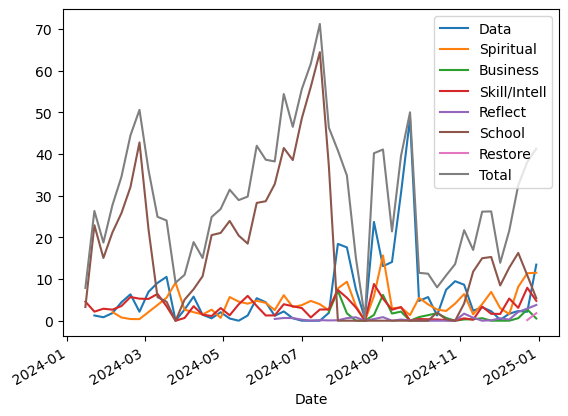

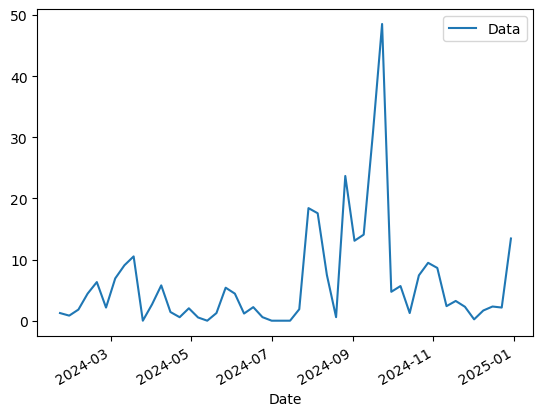

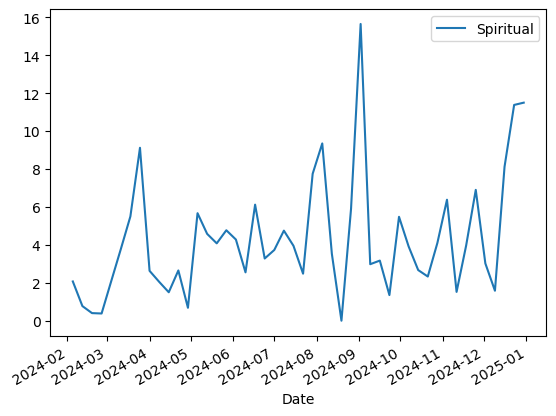

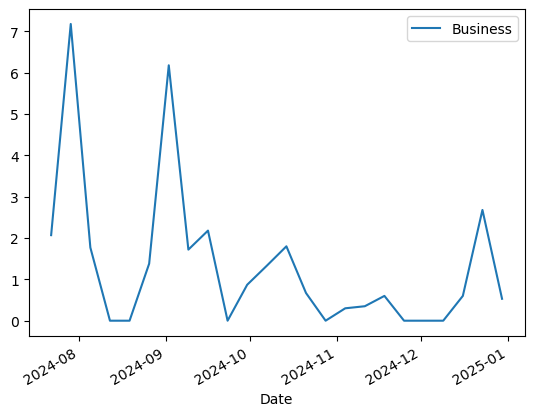

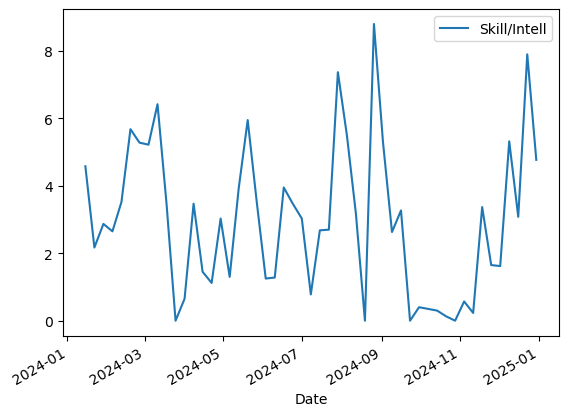

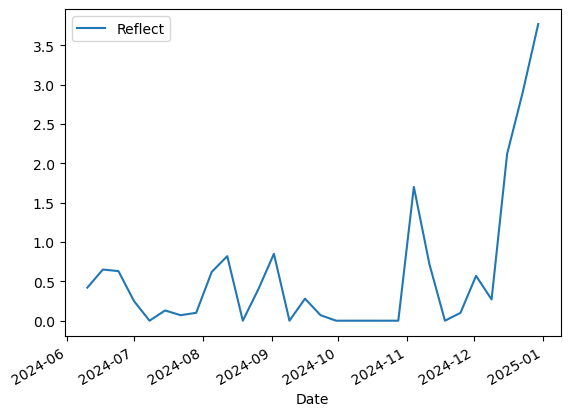

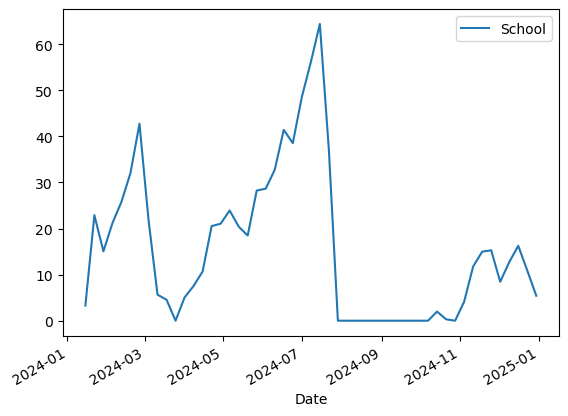

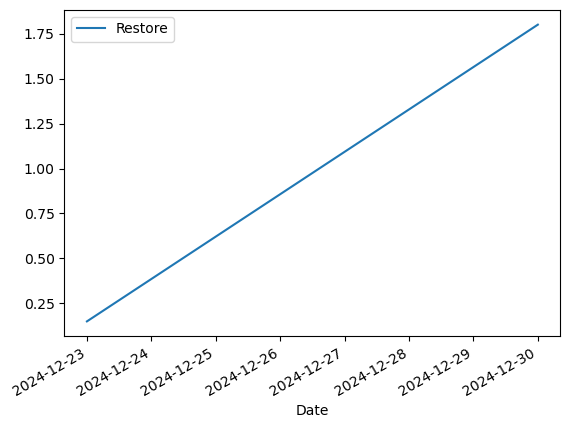

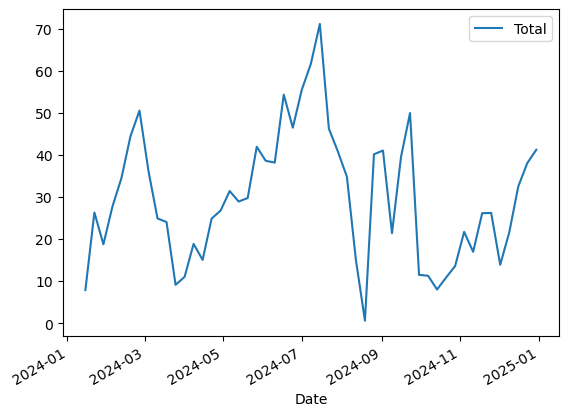

In [21]:
cleaned_cols = [x for x in focus.columns]
focus.plot(x = 'Date', y = cleaned_cols[1:])
focus.plot(x = 'Date', y = cleaned_cols[1])
focus.plot(x = 'Date', y = cleaned_cols[2])
focus.plot(x = 'Date', y = cleaned_cols[3])
focus.plot(x = 'Date', y = cleaned_cols[4])
focus.plot(x = 'Date', y = cleaned_cols[5])
focus.plot(x = 'Date', y = cleaned_cols[6])
focus.plot(x = 'Date', y = cleaned_cols[7])
focus.plot(x = 'Date', y = cleaned_cols[8])
# focus.plot(x = 'Date', y = cleaned_cols[:])

In [34]:
"""Resampling by month"""
monthly = focus.resample(rule = 'ME', on = 'Date').sum()#.plot(y = 'School')
Data = monthly.loc[:,['Data']]#.plot()
Spiritual = monthly.loc[:,['Spiritual']]#.plot()
School = monthly.loc[:,['School']]
Skill_Intell = monthly.loc[:,['Skill/Intell']]
monthly

,Data,Spiritual,Business,Skill/Intell,Reflect,School,Restore,Total
Date,,,,,,,,
2024-01-31,2.08,0.00,0.00,9.62,0.00,41.23,0.00,52.93
2024-02-29,14.72,3.62,0.00,17.13,0.00,121.77,0.00,157.24
2024-03-31,26.51,20.47,0.00,15.11,0.00,32.13,0.00,94.22
2024-04-30,12.47,9.51,0.00,9.72,0.00,64.85,0.00,96.55
2024-05-31,7.18,19.10,0.00,14.70,0.00,91.07,0.00,132.05
2024-06-30,8.40,16.23,0.00,9.95,1.70,141.37,0.00,177.65
2024-07-31,20.30,22.66,9.25,16.56,0.55,206.12,0.00,275.44
2024-08-31,49.32,18.78,3.15,17.47,1.84,0.00,0.00,90.56
2024-09-30,111.06,28.63,10.95,11.60,1.20,0.00,0.00,163.44


<Axes: xlabel='Date'>

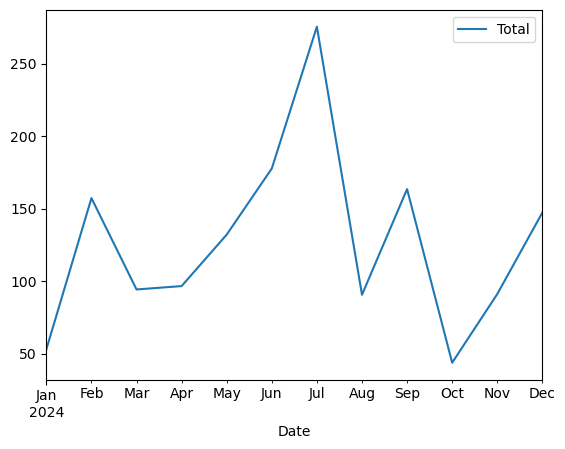

In [30]:
monthly.plot(kind = 'line', y = 'Total')

([<matplotlib.axis.XTick at 0x1e84a0d6db0>,
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

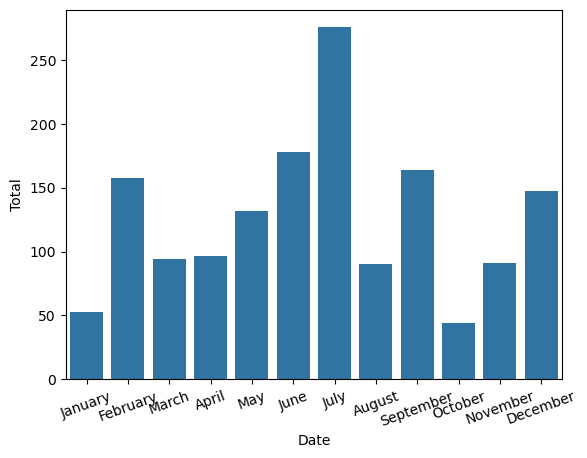

In [56]:
months = lambda x : x.month_name()
sns_monthly = monthly.rename(index = months)
sns.barplot(sns_monthly, x = sns_monthly.index, y = 'Total')
plt.xticks(range(len(sns_monthly.index)), rotation = 20)

<Axes: xlabel='Date'>

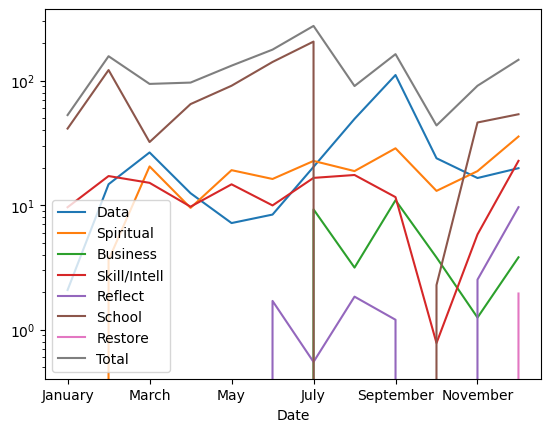

In [41]:
sns_monthly.plot(logy = True)

<Axes: ylabel='Date'>

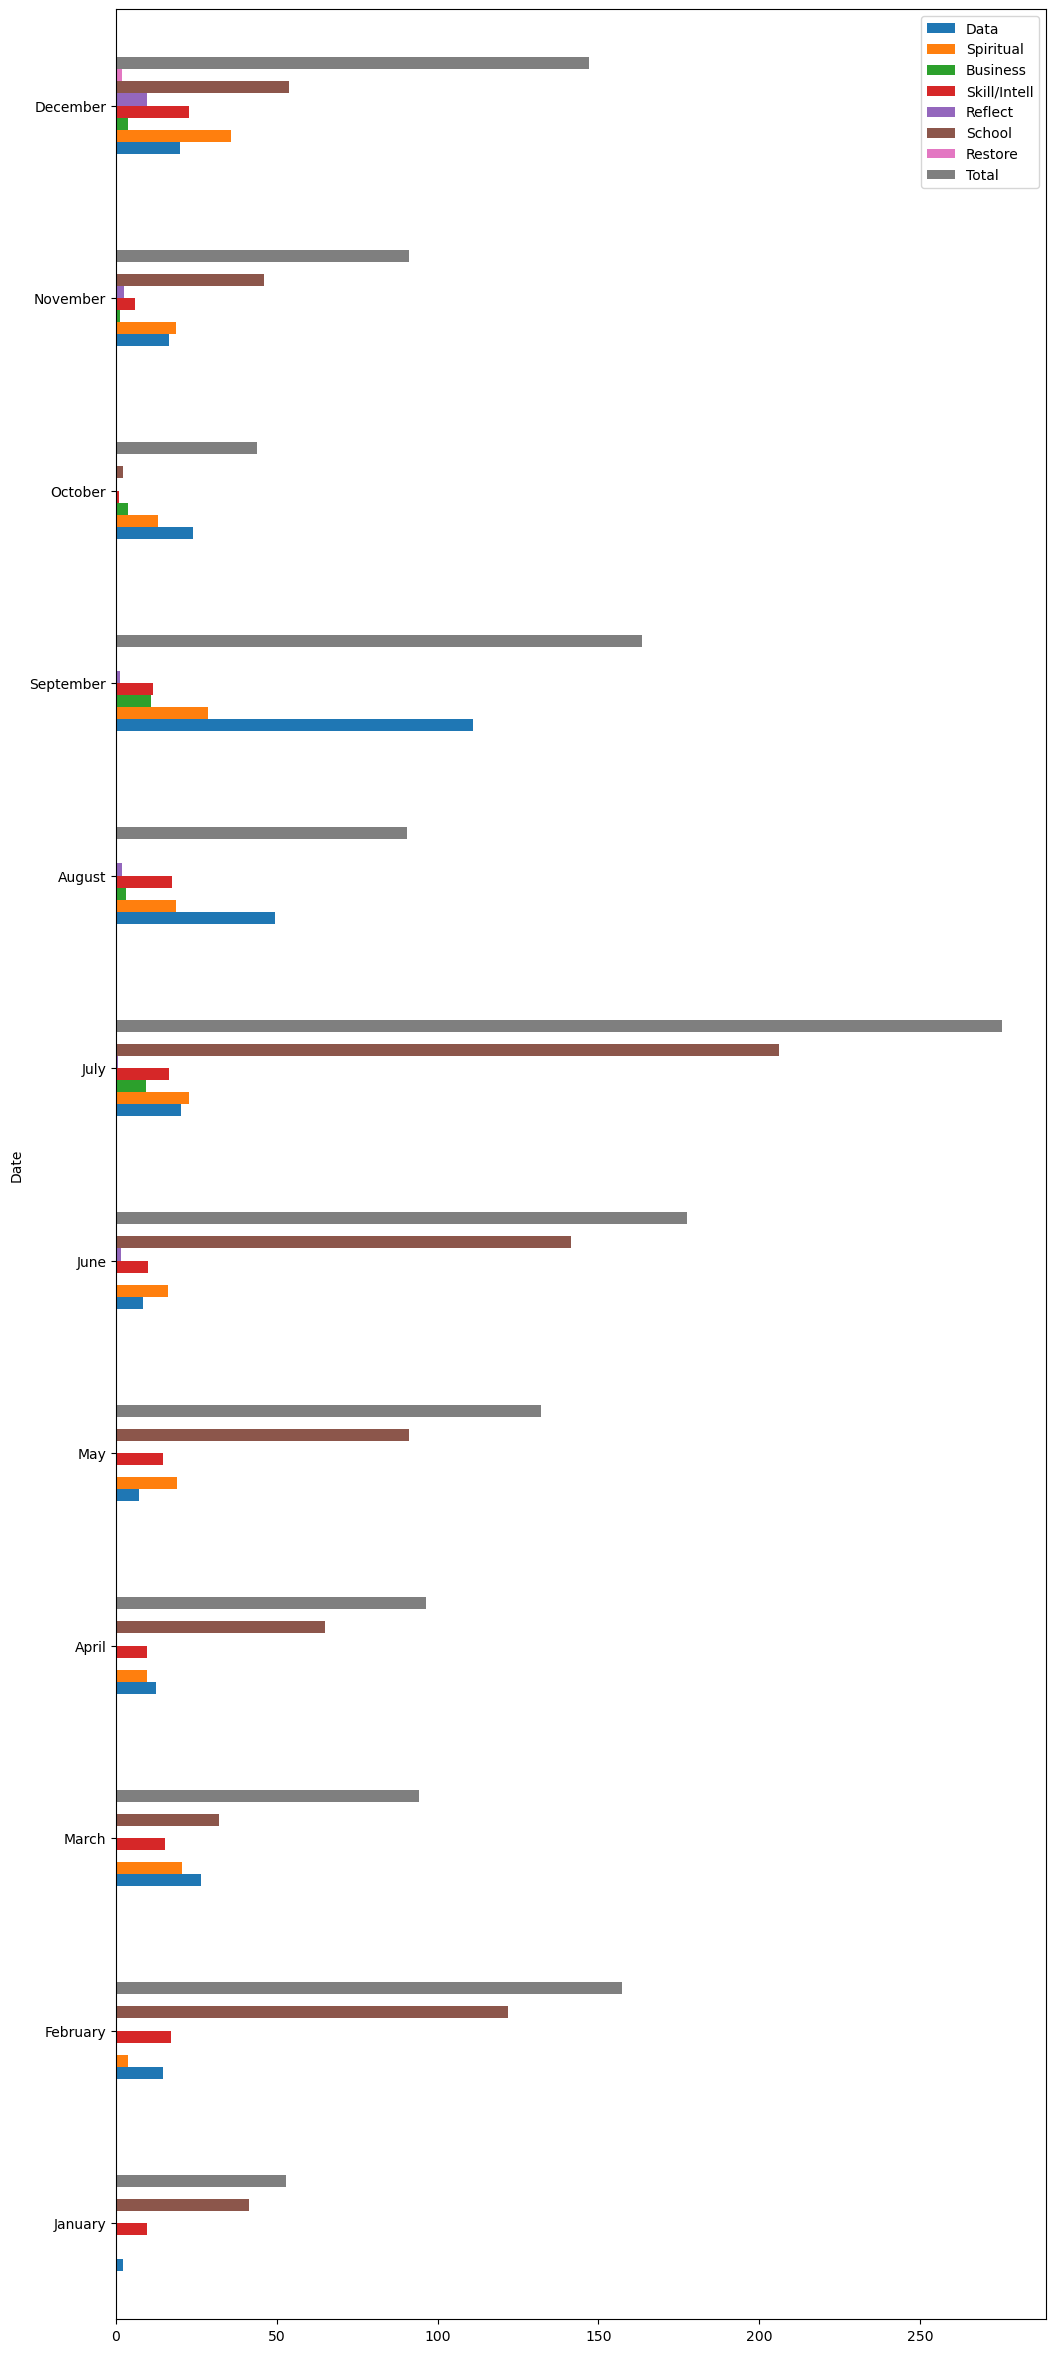

In [51]:
sns_monthly.plot(kind = 'barh', figsize = (12,30))

Text(0.5, 1.0, 'Time spent on Skill and Intellectual Growth')

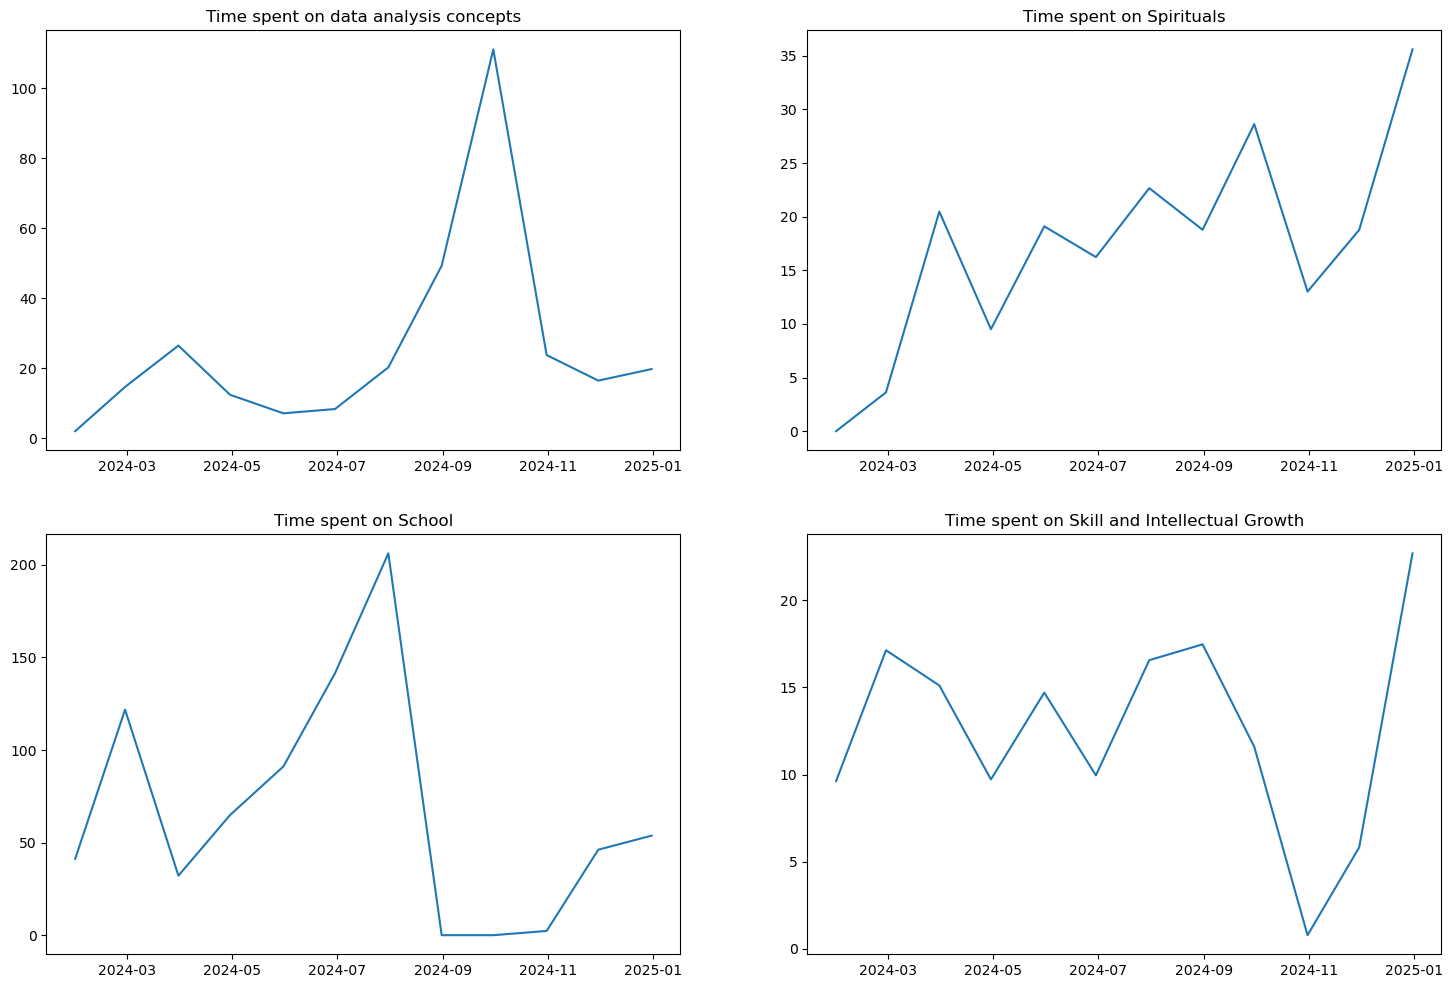

In [35]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,2, figsize = (18,12))
ax[0,0].plot(Data)
ax[0,0].set_title('Time spent on data analysis concepts')
ax[0,1].plot(Spiritual)
ax[0,1].set_title('Time spent on Spirituals')
ax[1,0].plot(School)
ax[1,0].set_title('Time spent on School')
ax[1,1].plot(Skill_Intell)
ax[1,1].set_title('Time spent on Skill and Intellectual Growth')
